In [2]:
import numpy as np
import pandas as pd

# Data Preprocessing and Scaling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Resampling Techniques for Imbalanced Data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Classifiers and Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier  # Optional ensemble methods

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
# Deep Learning Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from pytorch_tabnet.tab_model import TabNetClassifier

# Model Evaluation
from sklearn.metrics import (
    classification_report, roc_auc_score, accuracy_score,
    confusion_matrix, precision_recall_curve
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('data/train_data.csv')
test = pd.read_csv('data/test_data.csv')

In [4]:
len(train.columns)

114

In [5]:
# Define the target variable (e.g., 'target') and features (all other columns)
X_train = train.drop('readmitted', axis=1)  # Drop the target column for features
y_train = train['readmitted']  # Select the target column

X_test = test.drop('readmitted', axis=1)  # Same for test set
y_test = test['readmitted']

#### Feature scaling and balancing



In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Scale the variables
scaler = StandardScaler()

# Scale the training set
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test set
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()  # Keeps all components

# Fit PCA on the training data and transform it
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data
X_test_pca = pca.transform(X_test_scaled)

# Convert to DataFrame for easier analysis
X_train_pca = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

# Print the explained variance ratio for each principal component
print("Explained Variance Ratio (PCA):")
print(pca.explained_variance_ratio_)

# Optional: print the cumulative explained variance to decide the number of components
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("\nCumulative Explained Variance:")
print(cumulative_variance)

Explained Variance Ratio (PCA):
[3.16898565e-02 2.62966496e-02 2.26171964e-02 2.00403482e-02
 1.93567808e-02 1.78269103e-02 1.65660083e-02 1.60255227e-02
 1.44812713e-02 1.40367896e-02 1.35523003e-02 1.30213837e-02
 1.28626490e-02 1.26418978e-02 1.24900475e-02 1.21798559e-02
 1.18348020e-02 1.15009421e-02 1.11726170e-02 1.09155493e-02
 1.07980056e-02 1.04576045e-02 1.04342921e-02 1.01400612e-02
 1.00441471e-02 9.93885075e-03 9.83120555e-03 9.79250556e-03
 9.71272924e-03 9.70335540e-03 9.56516477e-03 9.52394674e-03
 9.49511310e-03 9.42541806e-03 9.41000757e-03 9.30340481e-03
 9.28601807e-03 9.21921509e-03 9.20650523e-03 9.18423991e-03
 9.16153173e-03 9.15450701e-03 9.08996394e-03 9.06846181e-03
 9.05638105e-03 9.02535285e-03 8.99517582e-03 8.98505428e-03
 8.95821609e-03 8.94788110e-03 8.94337138e-03 8.93802479e-03
 8.90474106e-03 8.89900801e-03 8.89288044e-03 8.87737513e-03
 8.86126914e-03 8.83186122e-03 8.80762045e-03 8.75285707e-03
 8.74296317e-03 8.72519449e-03 8.69210365e-03 8.65659

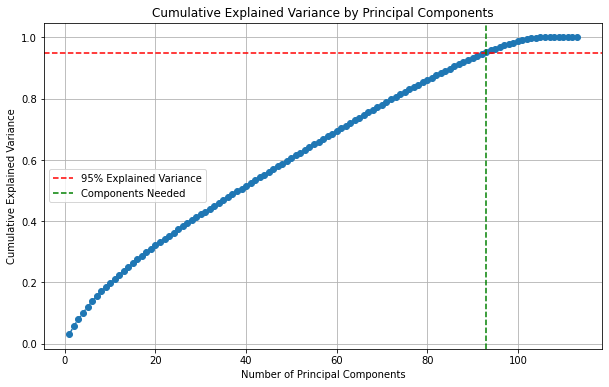

Number of components needed to explain 95% of the variance: 93


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Get the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='--', label='Components Needed')
plt.legend()
plt.grid(True)
plt.show()

# Number of components needed to explain 95% of the variance
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed to explain 95% of the variance: {num_components_95}")


Explained variance for each component: [1.]
Cumulative variance explained: [1.]
Top contributing variables to LD1:
number_inpatient_log           0.443313
discharge_disposition_id_22    0.221215
discharge_disposition_id_11    0.178975
number_emergency_log           0.100478
discharge_disposition_id_1     0.093911
discharge_disposition_id_13    0.086258
discharge_disposition_id_3     0.079370
diabetesMed                    0.070376
metformin                      0.063451
diag2_2                        0.061208
discharge_disposition_id_2     0.052815
num_medications                0.051011
number_diagnoses               0.047854
diag2_11                       0.035593
discharge_disposition_id_12    0.035128
glimepiride                    0.033428
diag1_3                        0.032898
diag3_11                       0.031919
diag2_4                        0.031840
diag3_2                        0.030517
diag1_18                       0.030479
diag1_7                        0.030219
diag2

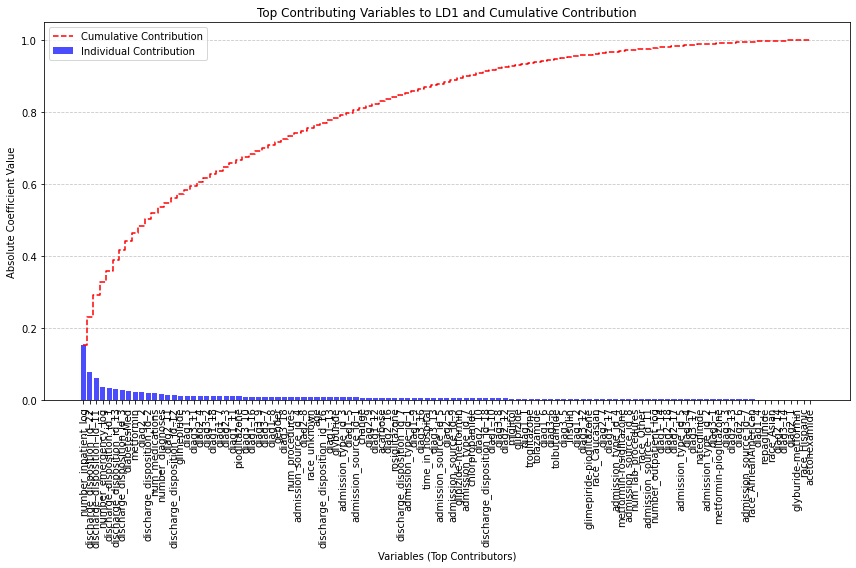

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Scale the variables
scaler = StandardScaler()

# Scale the training set
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test set
X_test_scaled = scaler.transform(X_test)

# Apply LDA
# Ensure 'y_train' is your target variable for training
lda = LinearDiscriminantAnalysis(n_components=None)  # Automatically chooses components

# Fit LDA on the training data and transform
X_train_lda = lda.fit_transform(X_train_scaled, y_train)

# Transform the test data
X_test_lda = lda.transform(X_test_scaled)

# Convert to DataFrame for easier analysis
X_train_lda = pd.DataFrame(X_train_lda, columns=[f'LD{i+1}' for i in range(X_train_lda.shape[1])])
X_test_lda = pd.DataFrame(X_test_lda, columns=[f'LD{i+1}' for i in range(X_test_lda.shape[1])])

# View the explained variance ratio for each component
explained_variance_ratio = lda.explained_variance_ratio_
print("Explained variance for each component:", explained_variance_ratio)
print("Cumulative variance explained:", explained_variance_ratio.cumsum())

# Analyze the LDA model coefficients
coefficients = pd.Series(lda.coef_[0], index=X_train.columns)

# Sort by absolute value to identify the most influential variables
coefficients_sorted = coefficients.abs().sort_values(ascending=False)

# Display the top 10 contributing variables to LD1
print("Top contributing variables to LD1:")
print(coefficients_sorted.head(30))

# Prepare the data for plotting
top_contributors = coefficients_sorted.head(30)  # Top 30 contributing variables
cumulative_contribution = top_contributors.cumsum()  # Cumulative sum of contributions

# Normalizar los coeficientes para que sumen 1
coefficients_normalized = coefficients_sorted / coefficients_sorted.sum()
cumulative_contribution_normalized = coefficients_normalized.cumsum()


# Plot the cumulative contribution of the top contributors
plt.figure(figsize=(12, 8))
plt.bar(coefficients_normalized.index, coefficients_normalized.values, alpha=0.7, label='Individual Contribution', color='blue')
plt.step(coefficients_normalized.index, cumulative_contribution_normalized, where='mid', linestyle='--', color='red', label='Cumulative Contribution')

# Add labels and titles
plt.xlabel('Variables (Top Contributors)')
plt.ylabel('Absolute Coefficient Value')
plt.title('Top Contributing Variables to LD1 and Cumulative Contribution')
plt.xticks(rotation=90)  # Rotate variable names for better visibility
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



In [9]:
selected_columns = [
    'number_inpatient_log',
    'discharge_disposition_id_22',
    'discharge_disposition_id_11',
    'number_emergency_log',
    'discharge_disposition_id_1',
    'discharge_disposition_id_13',
    'discharge_disposition_id_3',
    'diabetesMed',
    'metformin',
    'diag2_2'
]

X_train_reduced = X_train[selected_columns]
X_test_reduced = X_test[selected_columns]

In [10]:

# Identify the binary and continuous columns

# List of continuous columns that you want to scale
continuous_columns = ['age', 'time_in_hospital','num_lab_procedures','num_procedures', 'num_medications', 'number_outpatient_log',
       'number_emergency_log', 'number_inpatient_log']

# Separate the continuous features
X_train_continuous = X_train[continuous_columns]
X_test_continuous = X_test[continuous_columns]

# Apply StandardScaler to the continuous features
scaler = StandardScaler()
X_train_continuous_scaled = scaler.fit_transform(X_train_continuous)
X_test_continuous_scaled = scaler.fit_transform(X_test_continuous)


# Convert the scaled features back to a DataFrame
X_train_continuous_scaled = pd.DataFrame(X_train_continuous_scaled, columns=continuous_columns)
X_test_continuous_scaled = pd.DataFrame(X_test_continuous_scaled, columns=continuous_columns)

# Concatenate the scaled continuous columns with the rest of the data
X_train_scaled = pd.concat([X_train.drop(continuous_columns, axis=1), X_train_continuous_scaled], axis=1)
X_test_scaled = pd.concat([X_test.drop(continuous_columns, axis=1), X_test_continuous_scaled], axis=1)




In [11]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(sampling_strategy='minority',random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reduced, y_train)


In [12]:
# Generate subsamples and reduce data size to 10k

import numpy as np
from sklearn.model_selection import train_test_split

# Saved for DL methods
X_train_big, y_train_big, = X_train_resampled,y_train_resampled

# Split the training data into a new training set and validation set (80% training, 20% validation)
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, train_size=15000, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Now X_train_split and y_train_split are used for training, and X_val and y_val are used for validation
print(f"Shape of X_train_big: {X_train_big.shape}")
print(f"Shape of y_train_big: {y_train_big.shape}")

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")


print(f"Shape of X_train_val: {X_val.shape}")
print(f"Shape of y_train_val: {y_val.shape}")

print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")



Shape of X_train_big: (142310, 10)
Shape of y_train_big: (142310,)
Shape of X_train: (12000, 10)
Shape of y_train: (12000,)
Shape of X_train_val: (3000, 10)
Shape of y_train_val: (3000,)
Shape of X_test: (28462, 10)
Shape of y_test: (28462,)


In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(random_state=42)

In [14]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_proba = model.predict_proba(X_val)[:, 1]

# Evaluate the model
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

print(f"Validation ROC-AUC Score: {roc_auc_score(y_val, y_val_pred_proba):.4f}")


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1524
           1       0.61      0.59      0.60      1476

    accuracy                           0.62      3000
   macro avg       0.62      0.61      0.61      3000
weighted avg       0.62      0.62      0.61      3000

Validation ROC-AUC Score: 0.6587


In [15]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga','newton-cg'],
    'max_iter': [100, 200, 300],
}

# Grid search with cross-validation (using the validation set)
grid_search = GridSearchCV(LogisticRegression(random_state=42),
                           param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters found
print(f"Best Parameters: {grid_search.best_params_}")
    
# Use the best model
best_model = grid_search.best_estimator_

# Predict with the best model on the validation set
y_val_pred_best = best_model.predict(X_val)
y_val_pred_proba_best = best_model.predict_proba(X_val)[:, 1]

# Evaluate the best model on the validation set
print("Best Model Validation Classification Report:")
print(classification_report(y_val, y_val_pred_best))

print(f"Best Model Validation ROC-AUC Score: {roc_auc_score(y_val, y_val_pred_proba_best):.4f}")


Best Parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'saga'}
Best Model Validation Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      1524
           1       0.62      0.55      0.59      1476

    accuracy                           0.62      3000
   macro avg       0.62      0.62      0.61      3000
weighted avg       0.62      0.62      0.62      3000

Best Model Validation ROC-AUC Score: 0.6587


In [16]:
# # Make final predictions on the test set

# y_test_pred = best_model.predict(X_test_reduced)
# y_test_pred_proba = best_model.predict_proba(X_test_reduced)[:, 1]

# # Evaluate on the test set
# print("Test Classification Report:")
# print(classification_report(y_test, y_test_pred))

# print(f"Test ROC-AUC Score: {roc_auc_score(y_test, y_test_pred_proba):.4f}")


In [17]:
# ========== Grid Search with LogisticRegression ==========
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga', 'newton-cg'],  # Solvers for optimization
    'max_iter': [100, 200, 300],  # Maximum iterations
}

# Perform Grid Search with cross-validation (cv=5)
grid_search = GridSearchCV(LogisticRegression(random_state=42),
                           param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output the best hyperparameters
print(f"Best hyperparameters (LogisticRegression): {grid_search.best_params_}")

# Retrieve the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_pred_best = best_model.predict(X_test)  # Predicted classes
y_test_pred_proba_best = best_model.predict_proba(X_test)[:, 1]  # Predicted probabilities

print("\n==== Metrics of the Best Model (LogisticRegression) on Test Set ====")
print("Accuracy:", accuracy_score(y_test, y_test_pred_best))
print("Classification Report:")
print(classification_report(y_test, y_test_pred_best))
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_pred_proba_best):.4f}")

Best hyperparameters (LogisticRegression): {'C': 1, 'max_iter': 100, 'solver': 'saga'}

==== Metrics of the Best Model (LogisticRegression) on Test Set ====
Accuracy: 0.6167170262103858
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.66      0.63     14186
           1       0.63      0.57      0.60     14276

    accuracy                           0.62     28462
   macro avg       0.62      0.62      0.62     28462
weighted avg       0.62      0.62      0.62     28462

ROC-AUC: 0.6571


## Kernel Methods

In [18]:
# SVC with linear kernel
model_linear = SVC(kernel='linear', probability=True, random_state=42)
model_linear.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [19]:
# SVC kernel RBF
model_rbf = SVC(kernel='rbf', probability=True, random_state=42)
model_rbf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [20]:
# SVC kernel polinómico
model_poly = SVC(kernel='poly', degree=3, probability=True, random_state=42)
model_poly.fit(X_train, y_train)

SVC(kernel='poly', probability=True, random_state=42)

In [21]:
# SVC kernel sigmoide
model_sigmoid = SVC(kernel='sigmoid', probability=True, random_state=42)
model_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid', probability=True, random_state=42)

<Figure size 864x576 with 0 Axes>

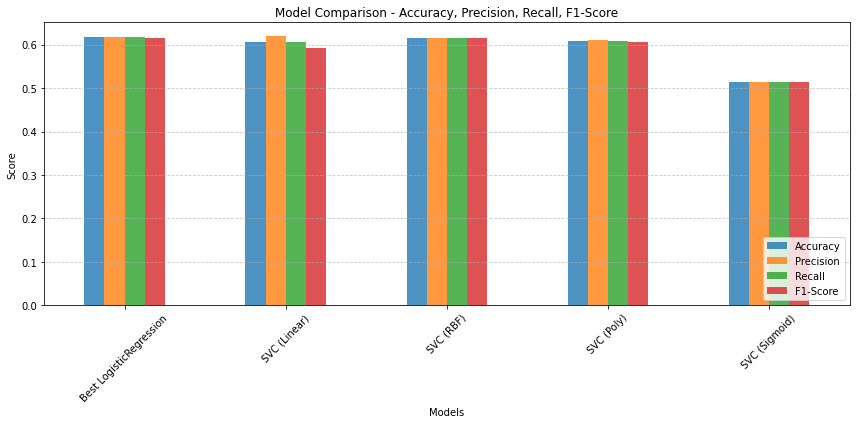

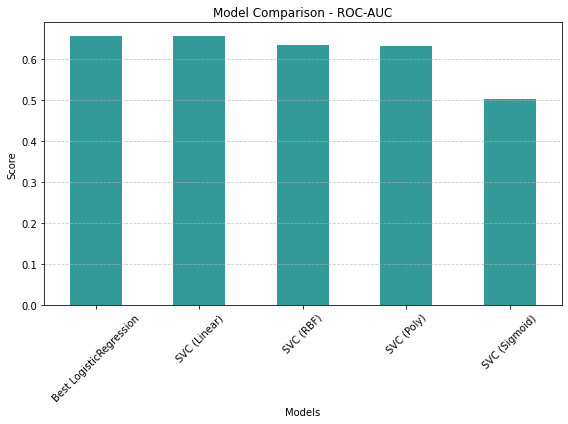

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluate a model on the test set and return key metrics.
    """
    metrics = {}
    y_pred = model.predict(X_test)
    metrics["Accuracy"] = accuracy_score(y_test, y_pred)
    
    if hasattr(model, "predict_proba"):  # Check if the model supports probability prediction
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        metrics["ROC-AUC"] = roc_auc_score(y_test, y_pred_proba)
        metrics["y_pred_proba"] = y_pred_proba  # Store probabilities for ROC curve
    else:
        metrics["ROC-AUC"] = None
        metrics["y_pred_proba"] = None

    # Classification report details
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics["Precision"] = report["weighted avg"]["precision"]
    metrics["Recall"] = report["weighted avg"]["recall"]
    metrics["F1-Score"] = report["weighted avg"]["f1-score"]

    return model_name, metrics

# Collect metrics for different models
results = []
# results.append(evaluate_model(best_model, X_test, y_test, "Best LogisticRegression"))
results.append(evaluate_model(model_linear, X_test, y_test, "SVC (Linear)"))
results.append(evaluate_model(model_rbf, X_test, y_test, "SVC (RBF)"))
results.append(evaluate_model(model_poly, X_test, y_test, "SVC (Poly)"))
results.append(evaluate_model(model_sigmoid, X_test, y_test, "SVC (Sigmoid)"))

# Convert results to a DataFrame for easier visualization
metrics_df = pd.DataFrame({name: metrics for name, metrics in results}).T

# Visualization of metrics
plt.figure(figsize=(12, 8))
metrics_df[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(kind="bar", figsize=(12, 6), alpha=0.8)
plt.title("Model Comparison - Accuracy, Precision, Recall, F1-Score")
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# ROC Curves for all models
plt.figure(figsize=(10, 8))
for model_name, row in metrics_df.iterrows():
    if row["y_pred_proba"] is not None:  # Only plot ROC if probabilities are available
        fpr, tpr, _ = roc_curve(y_test, row["y_pred_proba"])
        auc = row["ROC-AUC"]
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

# Add random guess line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")

# Add labels, title, and legend
plt.title("ROC Curves for Different Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## DL methods

In [23]:
# Scale the data for MLP and TabTransformer
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# x_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)

# Function to evaluate models
# Global list to store model metrics
model_metrics = []

def evaluate_model(y_true, y_pred, model_name, y_pred_proba=None):
    """
    Evaluates a model and stores key metrics for comparison.
    """
    print(f"\nEvaluation for {model_name}")
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    
    auc = None
    if y_pred_proba is not None:
        try:
            auc = roc_auc_score(y_true, y_pred_proba)
            print("AUC-ROC:", auc)
        except ValueError as e:
            print(f"Could not calculate AUC: {e}")
    else:
        print("AUC-ROC: Not available (probabilities are required)")
    
    # Store metrics in the global list
    model_metrics.append({
        "model_name": model_name,
        "accuracy": accuracy,
        "auc": auc
    })

In [24]:
def train_and_evaluate_model(model, model_name):
    print(f"\Training {model_name} model...")
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_big, y_train_big, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=0)

    # predictions
    y_pred_proba = model.predict(X_test).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)

    # eval model
    evaluate_model(y_test, y_pred, model_name, y_pred_proba)

# 1. Base MLP model
model_mlp_base = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
train_and_evaluate_model(model_mlp_base, "MLP Base")

# 2. Bigger and deeper model
model_mlp_deep = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
train_and_evaluate_model(model_mlp_deep, "MLP Deep")

# 3. Model with Batch Normalization
model_mlp_batchnorm = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
train_and_evaluate_model(model_mlp_batchnorm, "MLP BatchNorm")

# 4. Smaller model
model_mlp_small = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
train_and_evaluate_model(model_mlp_small, "MLP Small")

# 5. Model with SGD optimizer
model_mlp_sgd = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model_mlp_sgd.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
train_and_evaluate_model(model_mlp_sgd, "MLP SGD")

# 6. Model with LeakyReLU activation
from tensorflow.keras.layers import LeakyReLU
model_mlp_leakyrelu = Sequential([
    Dense(64, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(32),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
train_and_evaluate_model(model_mlp_leakyrelu, "MLP LeakyReLU")


\Training MLP Base model...


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

: 

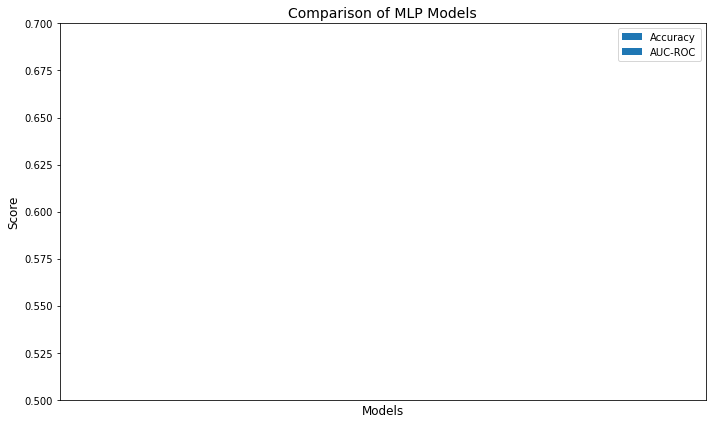

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Accuracy and AUC-ROC with y-axis starting at 0.5
def plot_metrics():
    # Extract data
    model_names = [m['model_name'] for m in model_metrics]
    accuracies = [m['accuracy'] for m in model_metrics]
    aucs = [m['auc'] if m['auc'] is not None else 0 for m in model_metrics]

    # Create bar chart
    x = np.arange(len(model_names))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8)
    bars2 = ax.bar(x + width/2, aucs, width, label='AUC-ROC', alpha=0.8)

    # Labels and customization
    ax.set_xlabel('Models', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.set_title('Comparison of MLP Models', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=30, ha='right')
    ax.set_ylim(0.5, 0.7)  # Set y-axis to start from 0.5
    ax.legend()

    # Display values on top of the bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.3f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # Offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Call the updated function
plot_metrics()